In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **point**

In [2]:
class Point:

  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z

  def __repr__(self):
    return f"Point(x = {self.x}, y = {self.y}, z = {self.z})"



/tmp/ipython-input-2149105044.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


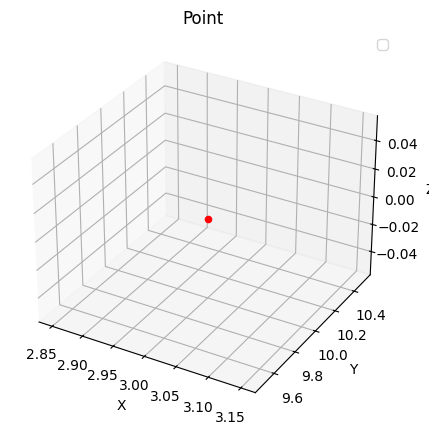

In [3]:
#visualize

p = Point(3, 10, 0)

fig = plt.figure(figsize=(5, 5))


ax = fig.add_subplot(111, projection = '3d')


ax.scatter(p.x, p.y, p.z, color = 'red')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Point")
ax.legend()
plt.show()

# **circle**

In [4]:
class Circle:
  def __init__(self, center, radius, num_points):
    self.center = center
    self.radius = radius
    self.num_points = num_points

  def _generate_points(self):
    points = []
    for i in range(self.num_points):
      angle = 2 * math.pi * i / self.num_points   #length of arc = r*theta
      x = self.center.x + self.radius * math.cos(angle)
      y = self.center.y + self.radius * math.sin(angle)
      z = self.center.z
      points.append(Point(x, y, z))
    return points

  def __repr__(self):
    return f"Circle(center = {self.center}, radius = {self.radius}, num_points = {self.num_points})"


In [5]:
#function for circle

c = Circle(Point(0, 0, 0), 5, 1000)

In [6]:
print(c)

Circle(center = Point(x = 0, y = 0, z = 0), radius = 5, num_points = 1000)


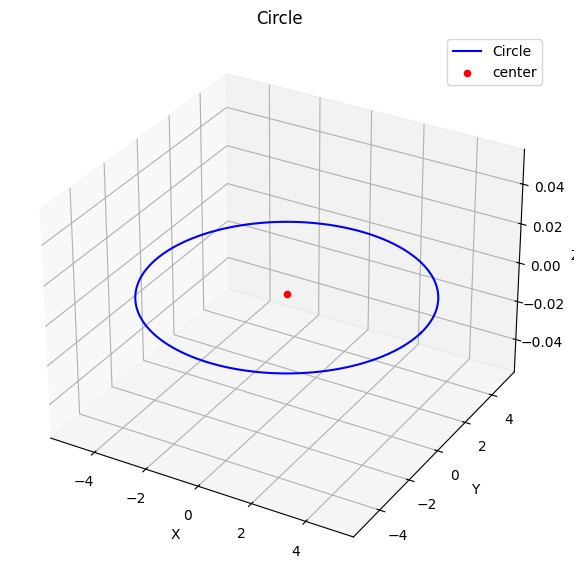

In [7]:
#visualize

points = c._generate_points()
x_val = [p.x for p in points]
y_val = [p.y for p in points]
z_val = [p.z for p in points]

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')


plt.plot(x_val + [x_val[0]], y_val + [y_val[0]], label = 'Circle', color = 'blue')
ax.scatter([c.center.x,], [c.center.y], label = 'center', color = 'red')

# Labels and style
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Circle")
ax.legend()
plt.show()


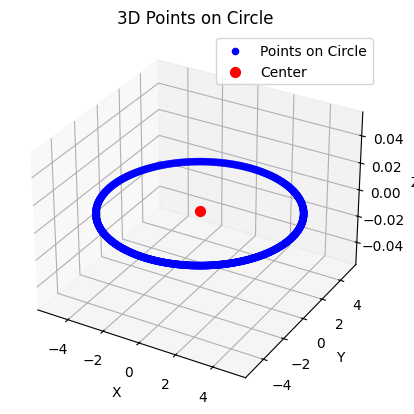

In [8]:
#visualize circle with points and center

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(x_val, y_val, z_val, color='blue', s=20, label="Points on Circle")

# Optional: Show center
ax.scatter([c.center.x], [c.center.y], [c.center.z], color='red', s=50, label="Center")

# Labels and style
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Points on Circle")
ax.legend()
plt.show()

# **extrude**

In [9]:
#create point

class Point:

  def __init__(self, x, y, z):
    self.x = x
    self.y = y
    self.z = z

  def translate(self, dx = 0, dy = 0, dz = 0):
    self.dx = self.x + dx
    self.dy = self.y + dy
    self.dz = self.z + dz

    return Point(self.x, self.dy, self.dz)

  def __repr__(self):
    return f"Point(x = {self.x}, y = {self.y}, z = {self.z})"



In [10]:
#create circle

class Circle:
  def __init__(self, center, radius, num_points):
    self.center = center
    self.radius = radius
    self.num_points = num_points

  def _generate_points(self):
    points = []
    for i in range(self.num_points):
      angle = 2 * math.pi * i / self.num_points   #length of arc = r*theta
      x = self.center.x + self.radius * math.cos(angle)
      y = self.center.y + self.radius * math.sin(angle)
      z = self.center.z
      points.append(Point(x, y, z))
    return points

  def __repr__(self):
    return f"Circle(center = {self.center}, radius = {self.radius}, num_points = {self.num_points})"


In [11]:
#extrude

def extrude(profile_points, height):
  top_face = [pt.translate(dz = height) for pt in profile_points]
  return profile_points, top_face



In [12]:
#visualize

def visualize(base, top):

  fig = plt.figure(figsize = (7, 7))
  ax = fig.add_subplot(111, projection = '3d')

  pts = c._generate_points()
  xs = [p.x for p in base] + [base[0].x]
  ys = [p.y for p in base] + [base[0].y]
  zs = [p.z for p in base] + [base[0].z]

  ax.plot(xs, ys, zs, color = 'red')

  xt = [p.x for p in top] + [top[0].x]
  yt = [p.y for p in top] + [top[0].y]
  zt = [p.z for p in top] + [top[0].z]

  ax.plot(xt, yt, zt, color = 'blue')

  for b, t in zip(base, top):
    ax.plot([b.x, t.x], [b.y, t.y], [b.z, t.z], color = 'gray')

  plt.plot(xs, ys, zs, color = 'black') #bottom edge
  plt.plot(xt, yt, zt, color = 'black') #top edge

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title("Extruded Cylinder")
  plt.show()

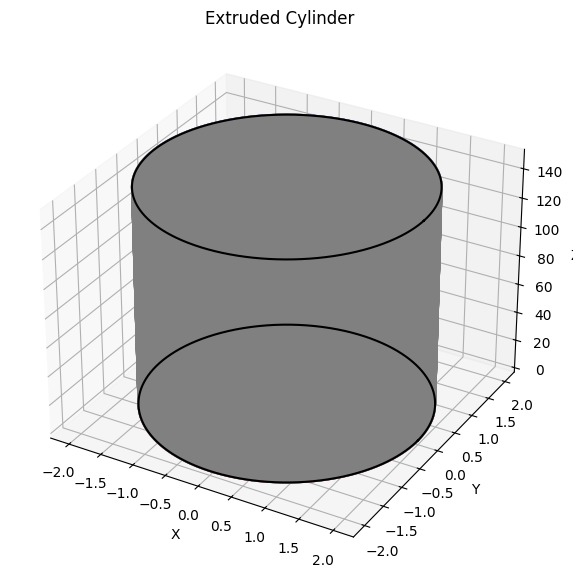

In [13]:
center = Point(0,0,0)
circle_points = Circle(center, radius = 2, num_points = 1000)._generate_points()
base, top  = extrude(circle_points, height = 150)
visualize(base, top)